In [6]:
import os
import sys
import pandas as pd

import mols2grid
import prolif as plf
import py3Dmol
from rdkit import Chem, DataStructs, RDConfig
from rdkit.Chem import Draw, PandasTools, Descriptors, DataStructs
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))

from utils import create_list_of_molecules, align_molecules, CreateProlifFingerPrint, design_new_molecules, create_sdf_file_from_molecules

In [7]:
df = pd.read_csv("data/egfr_chembl.csv", sep=";")

In [8]:
df.head()

,Parent Molecule ChEMBL ID,Parent Molecule Name,Parent Molecule Type,Max Phase,First Approval,USAN Stem,Smiles,Mechanism of Action,Mechanism Comment,Selectivity Comment,...,Binding Site Comment,References,Synonyms,ATC Codes,Level 4 ATC Codes,Level 3 ATC Codes,Level 2 ATC Codes,Level 1 ATC Codes,Parent Molecule ChEMBL ID.1,Np Likeness Score
0,CHEMBL2408045,SAPITINIB,Small molecule,2.0,NaN,'-tinib',CNC(=O)CN1CCC(Oc2cc3c(Nc4cccc(Cl)c4F)ncnc3cc2O...,Epidermal growth factor receptor erbB1 inhibitor,NaN,NaN,...,NaN,"{'CHEMBL2408045': [{'ref_id': '20145185', 'ref...","Sapitinib (INN, INN)|",NaN,NaN,NaN,NaN,NaN,CHEMBL2408045,-1.41
1,CHEMBL3545396,BMS-690514,Small molecule,2.0,NaN,NaN,COc1cccc(Nc2ncnn3ccc(CN4CC[C@@H](N)[C@H](O)C4)...,Epidermal growth factor receptor erbB1 inhibitor,NaN,NaN,...,NaN,"{'CHEMBL3545396': [{'ref_id': '21531814', 'ref...",Bms 6690514|Bms-690514,NaN,NaN,NaN,NaN,NaN,CHEMBL3545396,-1.12
2,CHEMBL4558324,LAZERTINIB,Small molecule,3.0,NaN,'-tinib',C=CC(=O)Nc1cc(Nc2nccc(-n3cc(CN(C)C)c(-c4ccccc4...,Epidermal growth factor receptor erbB1 inhibitor,NaN,NaN,...,NaN,"{'CHEMBL4558324': [{'ref_id': '34028784', 'ref...","Lazertinib (INN, USAN)|",L01EB09,L01EB - Epidermal growth factor receptor (EGFR...,L01E - PROTEIN KINASE INHIBITORS,L01 - ANTINEOPLASTIC AGENTS,L - ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,CHEMBL4558324,-1.60
3,CHEMBL3678958,RUSERONTINIB,Small molecule,3.0,NaN,'-tinib',CC(C)n1c(Nc2cccnc2)nc2cnc(Nc3ccc(N4CCN(C)CC4)c...,Epidermal growth factor receptor erbB1 inhibitor,NaN,Inhibits WT and L858R mutant EGFR. Also inhibi...,...,NaN,"{'CHEMBL3678958': [{'ref_id': '22402607', 'ref...",Ruserontinib (INN)|,NaN,NaN,NaN,NaN,NaN,CHEMBL3678958,-1.61
4,CHEMBL3663929,NAQUOTINIB,Small molecule,3.0,NaN,'-tinib',C=CC(=O)N1CC[C@@H](Oc2nc(Nc3ccc(N4CCC(N5CCN(C)...,Epidermal growth factor receptor erbB1 inhibitor,NaN,Active against WT and variant EGFR. Increased ...,...,NaN,"{'CHEMBL3663929': [{'ref_id': '28954786', 'ref...","Naquotinib (INN, USAN)|Naquotinib mesilate (JA...",NaN,NaN,NaN,NaN,NaN,CHEMBL3663929,-1.12


In [9]:
df.columns

Index(['Parent Molecule ChEMBL ID', 'Parent Molecule Name',
       'Parent Molecule Type', 'Max Phase', 'First Approval', 'USAN Stem',
       'Smiles', 'Mechanism of Action', 'Mechanism Comment',
       'Selectivity Comment', 'Target ChEMBL ID', 'Target Name', 'Action Type',
       'Target Type', 'Target Organism', 'Binding Site Name',
       'Binding Site Comment', 'References', 'Synonyms', 'ATC Codes',
       'Level 4 ATC Codes', 'Level 3 ATC Codes', 'Level 2 ATC Codes',
       'Level 1 ATC Codes', 'Parent Molecule ChEMBL ID.1',
       'Np Likeness Score'],
      dtype='object')

In [10]:
df.Smiles.to_list()

['CNC(=O)CN1CCC(Oc2cc3c(Nc4cccc(Cl)c4F)ncnc3cc2OC)CC1',
 'COc1cccc(Nc2ncnn3ccc(CN4CC[C@@H](N)[C@H](O)C4)c23)c1',
 'C=CC(=O)Nc1cc(Nc2nccc(-n3cc(CN(C)C)c(-c4ccccc4)n3)n2)c(OC)cc1N1CCOCC1',
 'CC(C)n1c(Nc2cccnc2)nc2cnc(Nc3ccc(N4CCN(C)CC4)cc3)nc21',
 'C=CC(=O)N1CC[C@@H](Oc2nc(Nc3ccc(N4CCC(N5CCN(C)CC5)CC4)cc3)c(C(N)=O)nc2CC)C1',
 'C=CC(=O)Nc1cc(Nc2ncc(C(=O)OC(C)C)c(-c3cn(C)c4ccccc34)n2)c(OC)cc1N(C)CCN(C)C',
 'C[C@@H]1COC(Nc2ccc3ncnc(Nc4ccc(OCc5nccs5)c(Cl)c4)c3c2)=N1',
 'C=CC(=O)Nc1cccc(Nc2nc(Nc3ccc(N4CCN(C(C)=O)CC4)cc3OC)ncc2C(F)(F)F)c1',
 'CCOc1cc2ncc(C#N)c(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN(C)C',
 'C=CC(=O)Nc1cccc(Oc2nc(Nc3ccc(N4CCN(C)CC4)cc3)nc3ccsc23)c1',
 'COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1NC(=O)/C=C/CN1CCCCC1',
 'C#Cc1cccc(Nc2ncnc3cc(OC)c(NC(=O)N4C[C@H]5CCN(C)[C@H]5C4)cc23)c1',
 'C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1',
 'CN(C)C/C=C/C(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O[C@H]1CCOC1',
 'CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2cc1NC(=O)/C=C/[C@H]1CCCN1C',
 'C#Cc1cc

In [11]:
df["romol"] = df['Smiles'].apply(lambda x: Chem.MolFromSmiles(x))

In [12]:
df.head()

,Parent Molecule ChEMBL ID,Parent Molecule Name,Parent Molecule Type,Max Phase,First Approval,USAN Stem,Smiles,Mechanism of Action,Mechanism Comment,Selectivity Comment,...,References,Synonyms,ATC Codes,Level 4 ATC Codes,Level 3 ATC Codes,Level 2 ATC Codes,Level 1 ATC Codes,Parent Molecule ChEMBL ID.1,Np Likeness Score,romol
0,CHEMBL2408045,SAPITINIB,Small molecule,2.0,NaN,'-tinib',CNC(=O)CN1CCC(Oc2cc3c(Nc4cccc(Cl)c4F)ncnc3cc2O...,Epidermal growth factor receptor erbB1 inhibitor,NaN,NaN,...,"{'CHEMBL2408045': [{'ref_id': '20145185', 'ref...","Sapitinib (INN, INN)|",NaN,NaN,NaN,NaN,NaN,CHEMBL2408045,-1.41,<rdkit.Chem.rdchem.Mol object at 0x00000224B04...
1,CHEMBL3545396,BMS-690514,Small molecule,2.0,NaN,NaN,COc1cccc(Nc2ncnn3ccc(CN4CC[C@@H](N)[C@H](O)C4)...,Epidermal growth factor receptor erbB1 inhibitor,NaN,NaN,...,"{'CHEMBL3545396': [{'ref_id': '21531814', 'ref...",Bms 6690514|Bms-690514,NaN,NaN,NaN,NaN,NaN,CHEMBL3545396,-1.12,<rdkit.Chem.rdchem.Mol object at 0x00000224B04...
2,CHEMBL4558324,LAZERTINIB,Small molecule,3.0,NaN,'-tinib',C=CC(=O)Nc1cc(Nc2nccc(-n3cc(CN(C)C)c(-c4ccccc4...,Epidermal growth factor receptor erbB1 inhibitor,NaN,NaN,...,"{'CHEMBL4558324': [{'ref_id': '34028784', 'ref...","Lazertinib (INN, USAN)|",L01EB09,L01EB - Epidermal growth factor receptor (EGFR...,L01E - PROTEIN KINASE INHIBITORS,L01 - ANTINEOPLASTIC AGENTS,L - ANTINEOPLASTIC AND IMMUNOMODULATING AGENTS,CHEMBL4558324,-1.60,<rdkit.Chem.rdchem.Mol object at 0x00000224B04...
3,CHEMBL3678958,RUSERONTINIB,Small molecule,3.0,NaN,'-tinib',CC(C)n1c(Nc2cccnc2)nc2cnc(Nc3ccc(N4CCN(C)CC4)c...,Epidermal growth factor receptor erbB1 inhibitor,NaN,Inhibits WT and L858R mutant EGFR. Also inhibi...,...,"{'CHEMBL3678958': [{'ref_id': '22402607', 'ref...",Ruserontinib (INN)|,NaN,NaN,NaN,NaN,NaN,CHEMBL3678958,-1.61,<rdkit.Chem.rdchem.Mol object at 0x00000224B03...
4,CHEMBL3663929,NAQUOTINIB,Small molecule,3.0,NaN,'-tinib',C=CC(=O)N1CC[C@@H](Oc2nc(Nc3ccc(N4CCC(N5CCN(C)...,Epidermal growth factor receptor erbB1 inhibitor,NaN,Active against WT and variant EGFR. Increased ...,...,"{'CHEMBL3663929': [{'ref_id': '28954786', 'ref...","Naquotinib (INN, USAN)|Naquotinib mesilate (JA...",NaN,NaN,NaN,NaN,NaN,CHEMBL3663929,-1.12,<rdkit.Chem.rdchem.Mol object at 0x00000224B03...


In [14]:
df["qed"] = df["romol"].apply(lambda x: Descriptors.qed(x))
df["molwt"] = df["romol"].apply(lambda x: Descriptors.ExactMolWt(x))


<Axes: >

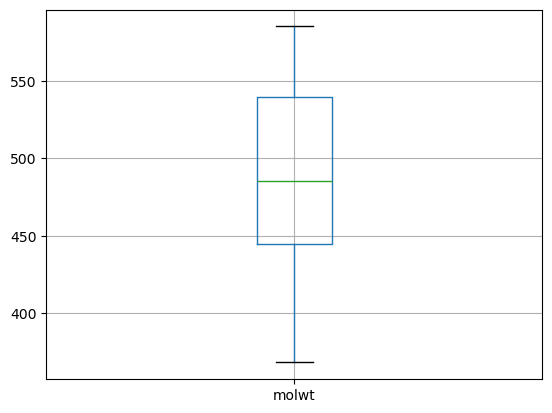

In [15]:
df.boxplot(column="molwt")

<Axes: >

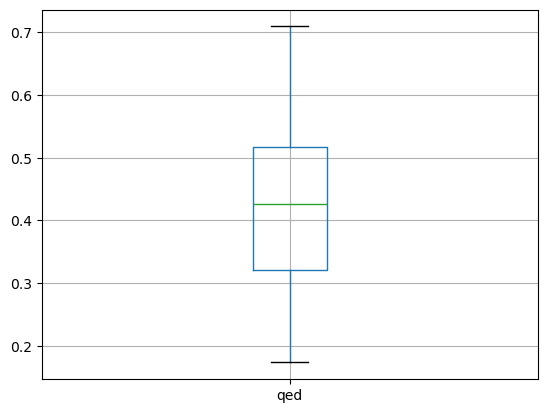

In [13]:
df.boxplot(column="qed")

In [11]:
PandasTools.WriteSDF(df, "data/egfr_chembl.sdf", molColName="romol", properties= df.columns )